In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import seawater as sw
from dask.diagnostics import ProgressBar

In [18]:
nemo.attrs

{'title': 'Monthly mean fields for product GLOBAL_REANALYSIS_PHY_001_030',
 'references': 'http://marine.copernicus.eu',
 'credit': 'E.U. Copernicus Marine Service Information (CMEMS)',
 'licence': 'http://marine.copernicus.eu/services-portfolio/service-commitments-and-licence/',
 'contact': 'servicedesk.cmems@mercator-ocean.eu',
 'producer': 'CMEMS - Global Monitoring and Forecasting Centre',
 'institution': 'Mercator Ocean',
 'Conventions': 'CF-1.6',
 'area': 'GLOBAL',
 'product': 'GLOBAL_REANALYSIS_001_030',
 'dataset': 'global-reanalysis-001-030-monthly',
 'source': 'MERCATOR GLORYS12V1',
 'product_user_manual': 'http://marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-030.pdf',
 'quality_information_document': 'http://marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-030.pdf',
 '_CoordSysBuilder': 'ucar.nc2.dataset.conv.CF1Convention',
 'comment': '',
 'history': 'Data extracted from dataset http://localhost:8080/thredds/dodsC/global-reanalysis-phy-001-030-monthly'}

In [11]:
nemo = xr.open_mfdataset('/home/br/git/CMEMS/nemo/nemo*')
nemo = nemo.reindex()
nemo.close()


/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [13]:
nemo.uo.attrs

{'long_name': 'Eastward velocity',
 'standard_name': 'eastward_sea_water_velocity',
 'units': 'm s-1',
 'unit_long': 'Meters per second',
 'cell_methods': 'area: mean',
 '_ChunkSizes': array([  1,   7, 341, 720], dtype=int32)}

In [ ]:
#nemo.vo.attrs

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


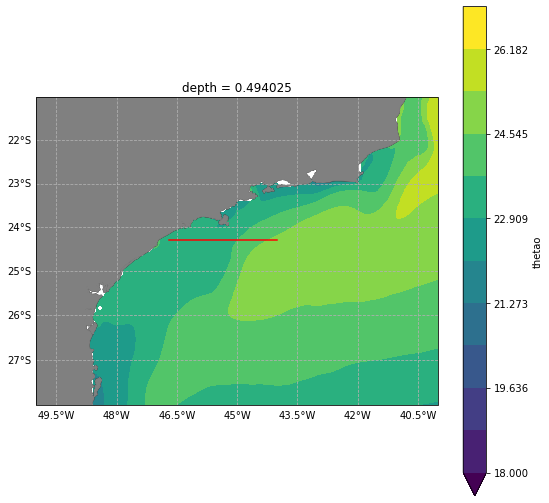

In [12]:
## definiçoes cartopy

land = cfeature.NaturalEarthFeature(
    'physical','land','10m',edgecolor='face',facecolor='0.5'
)

proj = ccrs.Mercator()

kw = dict(transform=ccrs.PlateCarree())

# plot thetao

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1,projection=proj)
nemo.sel(depth=0,method='nearest').thetao.mean('time').plot.contourf(ax=ax,vmin=18,vmax=27,levels=12,**kw)

ax.plot([-46.7,-44.0],[-24.3,-24.3],color='red',**kw,zorder=1e3)
ax.coastlines()
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True,linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.set_extent([
    -50, -40,
    -28, -21
],crs=ccrs.PlateCarree())

In [4]:
bc = nemo.sel(latitude=-24.3,method='nearest').sel(longitude=slice(-46.7,-44))
bcm = bc.groupby(bc.time.dt.month).mean()


/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


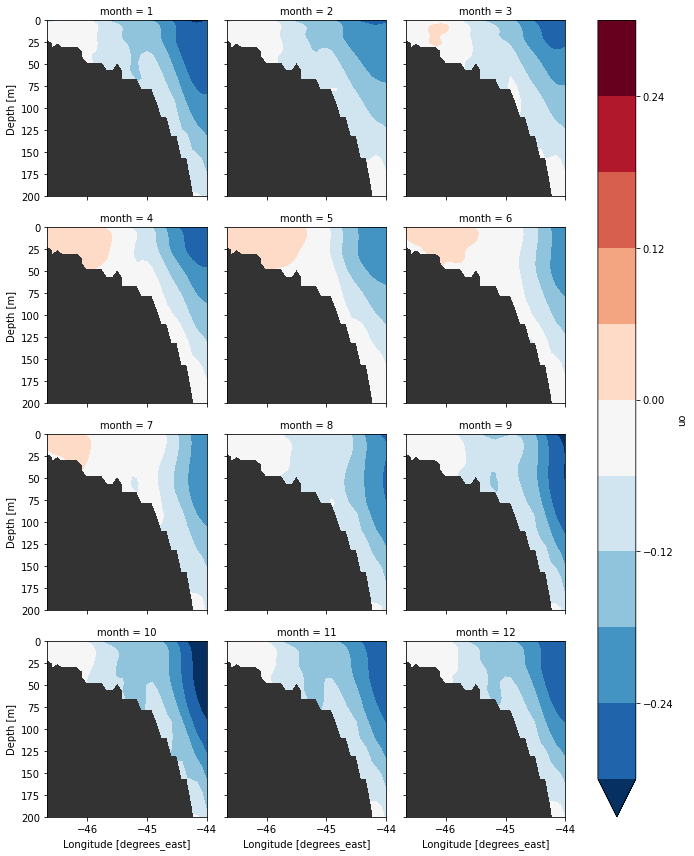

In [5]:
bcm.uo.plot.contourf(col='month',col_wrap=3,robust=True,levels=12,ylim=[200,0],subplot_kws=dict(facecolor='0.2'))

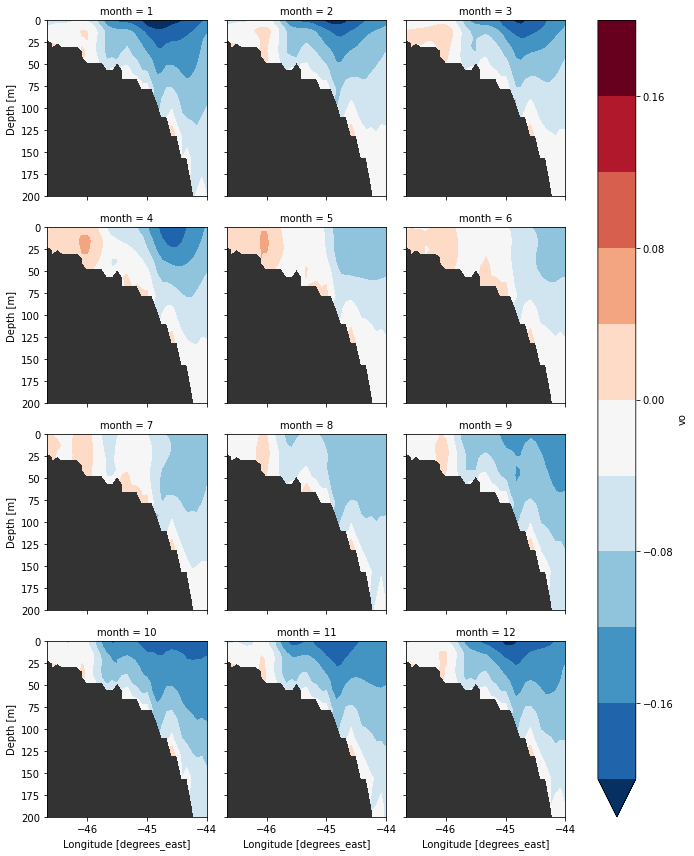

In [6]:
bcm.vo.plot.contourf(col='month',col_wrap=3,robust=True,levels=12,ylim=[200,0],subplot_kws=dict(facecolor='0.2'))

In [ ]:
# bcm.vo.where(bcm.vo>0.2).fillna(0).integrate('depth').integrate('longitude')*112e3*1e-6).plot()

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


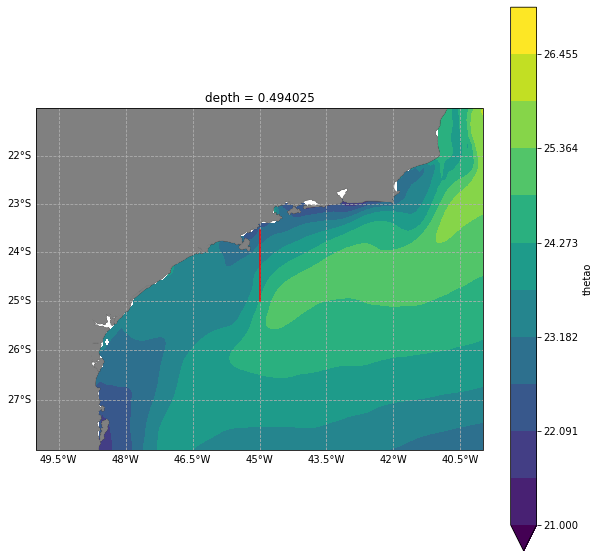

In [14]:
## definiçoes cartopy

land = cfeature.NaturalEarthFeature(
    'physical','land','10m',edgecolor='face',facecolor='0.5'
)

proj = ccrs.Mercator()

kw = dict(transform=ccrs.PlateCarree())

# plot

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection=proj)
nemo.sel(depth=0,method='nearest').thetao.mean('time').plot.contourf(ax=ax,vmin=21,vmax=27,levels=12,**kw)

ax.plot([-45,-45],[-25,-23.55],color='red',**kw,zorder=1e3)
ax.coastlines()
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True,linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.set_extent([
    -50, -40,
    -28, -21
],crs=ccrs.PlateCarree())

In [15]:
bc_1 = nemo.sel(longitude=-45,method='nearest').sel(latitude=slice(-25,-23.55))
bcm_1 = bc_1.groupby(bc_1.time.dt.month).mean()

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


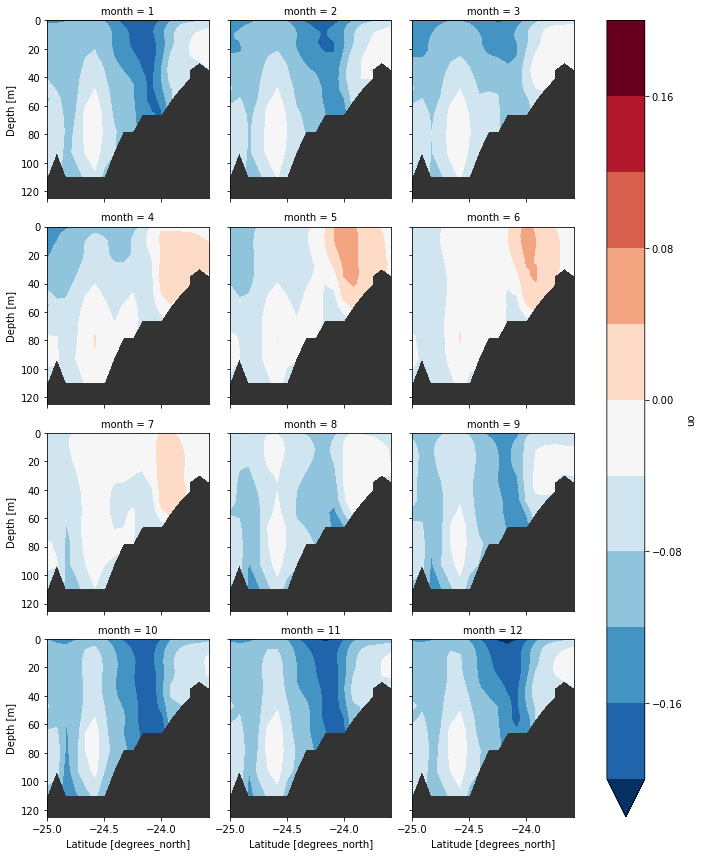

In [16]:
bcm_1.uo.plot.contourf(col='month',col_wrap=3,robust=True,levels=12,ylim=[125,0],subplot_kws=dict(facecolor='0.2'))

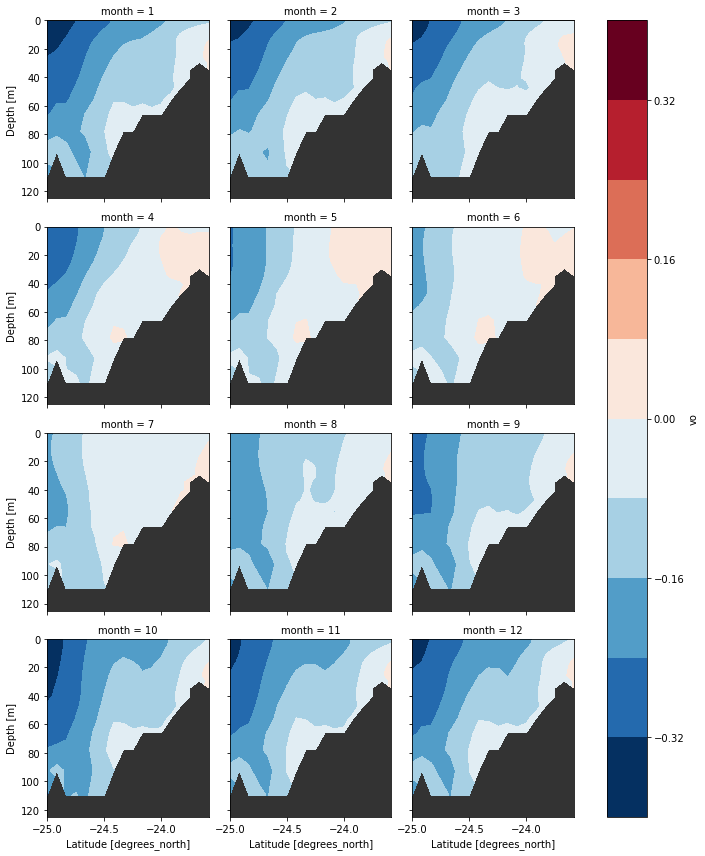

In [17]:
bcm_1.vo.plot.contourf(col='month',col_wrap=3,robust=True,levels=12,ylim=[125,0],subplot_kws=dict(facecolor='0.2'))

In [ ]:
# (bcm.uo.where(bcm.uo>0.0).fillna(0).integrate('depth').integrate('latitude')*112e3*1e-6).plot()
#(bcm_1.uo.where(bcm.uo<0.0).fillna(0).integrate('depth').integrate('latitude')*112e3*1e-6).plot()

In [3]:
# criando hovmollers
from scipy.ndimage.filters import gaussian_filter

def extract_bat(lon,lat,topo,level,flevel):
    CT = plt.contour(gaussian_filter(lon,flevel),
                     gaussian_filter(lat,flevel),gaussian_filter(topo,flevel),
                     [level],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
    # CT = plt.contour(lon,lat,topo,[-100],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
    lli = []
    for i in range(len(CT.allsegs[0])):
        print(CT.allsegs[0][i].shape[0])
        lli.append(CT.allsegs[0][i].shape[0])
        
    lbat = CT.allsegs[0][np.argmax(lli)]
    print('Maior shape é'.format(CT.allsegs[0][np.argmax(lli)].shape))

    return lbat[:,0],lbat[:,1]

def hov_ext_nemo_dist(x,y,nemo_file):

    hov_nemo = []

    xi,yi = x.copy(),y.copy() 

    for i in range(len(xi)):
        print("{:03.1f}%".format(100*(i+1)/len(xi)),end="\r")
        hov_nemo.append(nemo_file.sel(longitude=xi[i], latitude=yi[i], method='nearest'))

    hov_nemo = xr.concat(hov_nemo,dim='distance')
    hov_nemo = hov_nemo.assign_coords({'distance':np.hstack([0,np.cumsum(sw.dist(yi,xi)[0])])}) #


    with ProgressBar():
        hov_nemo = hov_nemo.compute()
        
    hov_nemo = hov_nemo.interpolate_na('distance').interpolate_na('time')
    
    return hov_nemo

In [5]:
# LOAD BATHYMETRY

dado = xr.open_dataset('/home/br/git/CMEMS/gebco-data/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

bat = dado.interp({'lon':nemo.longitude, 'lat':nemo.latitude}).elevation

dado.close()
bat.close()

180
Maior shape é
165
Maior shape é


/tmp/ipykernel_27935/3488411810.py:5: UserWarning: The following kwargs were not used by contour: 'latlon'
  CT = plt.contour(gaussian_filter(lon,flevel),


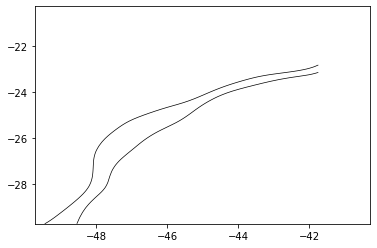

In [6]:
#----------- SELEÇÃO SEÇÕES DE ACORDO COM A BATIMETRIA SUAVE ---------------- #

xbat,ybat,zbat = bat.lat.values,bat.lon.values,bat.values

x, y =  extract_bat(ybat, xbat, zbat, level = -50, flevel = 5) # SELECIONANDO VETORES
#x_1, y_1 = extract_bat(ybat, xbat, zbat, level = -100, flevel = 10)
#x_2, y_2 = extract_bat(ybat, xbat, zbat, level = -150, flevel = 10)
x_3, y_3 = extract_bat(ybat, xbat, zbat, level = -200, flevel = 5)

x,y = x[::10],y[::10]
#x_1,y_1 = x_1[::10],y_1[::10] 
#x_2,y_2 = x_2[::10],y_2[::10]
x_3,y_3 = x_3[::10],y_3[::10]

In [8]:
hov_nemo  = hov_ext_nemo_dist(x,y,nemo)

[########################################] | 100% Completed |  2.0s


In [21]:
hov_nemo.uo.plot(y='distance')

(array([  169.,   968.,  1875.,  3494.,  8417., 22435., 46378.,  8575.,
          829.,   100.]),
 array([-0.54628134, -0.46351513, -0.38074893, -0.29798275, -0.21521655,
        -0.13245034, -0.04968414,  0.03308206,  0.11584826,  0.19861445,
         0.28138065], dtype=float32),
 <BarContainer object of 10 artists>)

ConversionError: Failed to convert value(s) to axis units: 'distance'

<Figure size 432x288 with 1 Axes>

In [14]:
import cmocean as cmo

plt.figure(figsize=(8 ,2), dpi =200)
np.log10(hov_nemo.uo).mean().plot.contourf(y=hov_nemo. cmap= cmo.cm.matter_r,robust=True)
plt.xlabel('years')
plt.ylabel('Latitude')
plt.title('Hovmoller Diagram of CDM - 1998 to 2008')
plt.tight_layout()

/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/br/miniconda3/envs/ocean/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


ValueError: y must be one of None, ''

<Figure size 1600x400 with 0 Axes>